In [0]:
#importing pyspark
import pyspark

In [0]:
#creating spark context
sc=pyspark.SparkContext.getOrCreate()
log_of_songs = ["Despacito","Nice for What","No tears left to cry","Despacito","Havana","In my feelings","Nice for what","despacito","All the stars"]

In [0]:
#here we are creating rdd.
#Resilient Distributed Dataset (RDD), which is a fault-tolerant collection of elements that can be operated on in parallel. 
distributed_song_log = sc.parallelize(log_of_songs)
print(distributed_song_log)

ParallelCollectionRDD[1] at readRDDFromInputStream at PythonRDD.scala:413


In [0]:
#it will convert the elements to lowercase
def convert_song_to_lowercase(song):
    return song.lower()

In [0]:
#map will covert the rdd elements according to the function
distributed_song_log.map(convert_song_to_lowercase)


Out[8]: PythonRDD[2] at RDD at PythonRDD.scala:58

In [0]:
#PySpark RDD/DataFrame collect() is an action operation that is used to retrieve all the elements of the dataset (from all nodes) to the driver node.
distributed_song_log.map(convert_song_to_lowercase).collect()

Out[9]: ['despacito',
 'nice for what',
 'no tears left to cry',
 'despacito',
 'havana',
 'in my feelings',
 'nice for what',
 'despacito',
 'all the stars']

In [0]:
distributed_song_log.collect()

Out[10]: ['Despacito',
 'Nice for What',
 'No tears left to cry',
 'Despacito',
 'Havana',
 'In my feelings',
 'Nice for what',
 'despacito',
 'All the stars']

In [0]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [0]:
# creating another spark session for 
spark= SparkSession \
    .builder \
    .getOrCreate()

In [0]:
spark.sparkContext.getConf().getAll()

Out[14]: [('spark.databricks.preemption.enabled', 'true'),
 ('spark.sql.hive.metastore.jars', '/databricks/databricks-hive/*'),
 ('spark.driver.tempDirectory', '/local_disk0/tmp'),
 ('spark.sql.warehouse.dir', 'dbfs:/user/hive/warehouse'),
 ('spark.databricks.managedCatalog.clientClassName',
  'com.databricks.managedcatalog.ManagedCatalogClientImpl'),
 ('spark.hadoop.fs.gs.impl',
  'shaded.databricks.com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem'),
 ('spark.executor.extraJavaOptions',
  '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.2.1 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#Now, We will create a small dataframe from a small sample data set which is a log file data set that describes user interactions with a music #streaming service. The records describe events such as logging in to the site, visiting a page, listening to the next song, seeing an ad

path= "dbfs:/FileStore/tables/sparkify_log_small.json"
user_log = spark.read.json(path)

In [0]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [0]:
#describe will Computes basic statistics for numeric and string columns.
user_log.describe()

Out[19]: DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [0]:
# show Prints the first n rows to the console.
user_log.show(n=1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------

In [0]:
# take will Returns the first num rows as a list of Row.
user_log.take(5)

Out[21]: [Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In'

In [0]:
out_path = ".//sparkify_log_small.csv"
# This will save the file in csv
user_log.write.save(out_path, format="csv", header=True)

In [0]:
user_log_2 = spark.read.csv("dbfs:/sparkify_log_small.csv", header=True)

In [0]:
user_log_2.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: string (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- sessionId: string (nullable = true)
 |-- song: string (nullable = true)
 |-- status: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [0]:
user_log_2.take(2)

Out[26]: [Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession='112', lastName='Matthews', length='232.93342', level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration='1509380319284', sessionId='5132', song='Christmas Tears Will Fall', status='200', ts='1513720872284', userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession='7', lastName='Chase', length='195.23873', level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration='1512718541284', sessionId='5027', song='Cheryl Tweedy', status='200', ts='1513720878284', userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000')]

In [0]:
# select() function is used to select single, multiple, column by index, all columns from the list and the nested columns from a DataFrame
user_log_2.select("userId").show()

+------+
|userId|
+------+
|  1046|
|  1000|
|  2219|
|  2373|
|  1747|
|  1747|
|  1162|
|  1061|
|   748|
|   597|
|  1806|
|   748|
|  1176|
|  2164|
|  2146|
|  2219|
|  1176|
|  2904|
|   597|
|   226|
+------+
only showing top 20 rows



In [0]:
# Data Exploration

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf # udf is user defined function
from pyspark.sql.types import StringType # used to represent string values
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc  # Returns a sort expression based on the descending order of the given column name
from pyspark.sql.functions import asc # Returns a sort expression based on the ascending order of the given column name
from pyspark.sql.functions import sum as Fsum # Aggregate function: returns the sum of all values in the expression.

import datetime
 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
path= "dbfs:/FileStore/tables/sparkify_log_small.json"
user_log = spark.read.json(path)

In [0]:
user_log.take(5)

Out[31]: [Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In'

In [0]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [0]:
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [0]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [0]:
user_log.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827561|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [0]:
user_log.count()

Out[36]: 10000

In [0]:
# it will drop the duplicates in "page" column and sort it
user_log.select("page").drop_duplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [0]:
# it will the selected columns where user id equal to 1046
user_log.select(["userId","firstname","page","song"]).where(user_log.userId=="1046").collect()

Out[38]: [Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname=

In [0]:
# Calculate Statistics by Hour

In [0]:
# lambda function to get hour
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour)

In [0]:
user_log = user_log.withColumn("hour",get_hour(user_log.ts))

In [0]:
user_log.head()

Out[42]: Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22')

In [0]:
# filter based on next song then group by using hour and count it and sorted according to hour
songs_in_hour = user_log.filter(user_log.page=="NextSong").groupBy(user_log.hour).count().orderBy(user_log.hour.cast("float"))
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
|   5|  276|
|   6|  348|
|   7|  358|
|   8|  375|
|   9|  249|
|  10|  216|
|  11|  228|
|  12|  251|
|  13|  339|
|  14|  462|
|  15|  479|
|  16|  484|
|  17|  430|
|  18|  362|
|  19|  295|
+----+-----+
only showing top 20 rows



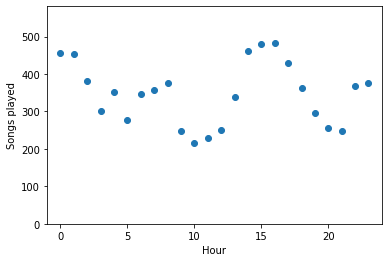

In [0]:
# scatterplot to see the relationship between Count of songs played and hour
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");

In [0]:
#dropping null values
user_log_valid = user_log.dropna(how="any", subset = ["userId","sessionId"])

In [0]:
user_log_valid.count()

Out[49]: 10000

In [0]:
#dropping duplicates
user_log.select("userId").drop_duplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [0]:
user_log_valid.count()

Out[51]: 10000

In [0]:
#filter user id where uder id is not equal to ""
user_log_valid = user_log_valid.filter(user_log_valid["userId"] !="")

In [0]:
user_log_valid.count()

Out[53]: 9664

In [0]:
#filter page on Submit Downgrade
user_log_valid.filter("page = 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  11|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [0]:
# from the abbove query we came to know that user id =1138 has submit downgrade.
# So we are Selecting only columns where user id == 1138
user_log.select(["userId","firstname","page","level","song"]).where(user_log_valid.userId=="1138").collect()

Out[56]: [Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId=

In [0]:
# we are creating a lambda function if x= "Submit Downgrade" then 1 else 0
flag_downgrade_event = udf(lambda x: 1 if x == " Submit Downgrade" else 0, IntegerType())

In [0]:
#Creating a column Downgraded where page ="Submit Downgrade" is 1 else 0
user_log_valid = user_log_valid.withColumn("downgraded",flag_downgrade_event("page"))

In [0]:
user_log_valid.head()

Out[60]: Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22', downgraded=0)

In [0]:
#importing windows function
from pyspark.sql import Window

In [0]:
#window partitioned by userId and ordered by ts
#UNBOUNDED PRECEDING indicates that the window starts at the first row of the partition; offset PRECEDING indicates that the window starts a number of #rows equivalent to the value of offset before the current row. UNBOUNDED PRECEDING is the default.

windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding,0)

In [0]:
#applying the windows function
user_log_valid = user_log_valid.withColumn("phase",Fsum("downgraded").over(windowval))

In [0]:
#selecting the columns where user_id =1138 and sorting it according to timestamp 
user_log_valid.select(["userId","Firstname","ts","page","level","phase"]).where(user_log_valid.userId=="1138").sort("ts").collect()

Out[65]: [Row(userId='1138', Firstname='Kelly', ts=1513729066284, page='Home', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', phase=0),
 Row(userId='1138', Firstname='Kelly', ts=1513731182284, page='NextSong', level='paid', phase=0),
 Row(userId='11